In [75]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_pd = pd.read_csv(city_data_to_load)
ride_data_pd = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_df = city_data_pd.merge(ride_data_pd, on="city")

# Display the data table for preview
merge_df.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

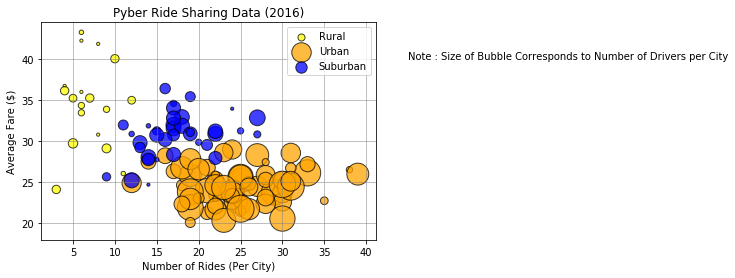

In [60]:
# Obtain the x and y coordinates for each of the three city types

groupby_city = merge_df.groupby('city')
avg_fare = groupby_city['fare'].mean()
ride_count = groupby_city['fare'].count()
driver_count = groupby_city['driver_count'].mean()

city_type = city_data_pd.set_index('city')['type']

city_df = pd.DataFrame({"Number of Rides": ride_count,
                        "Average Fare": avg_fare,
                        "Driver Count": driver_count,
                        "Type of City": city_type})

rural_df = city_df[city_df['Type of City'] == 'Rural']
urban_df = city_df[city_df['Type of City'] == 'Urban']
suburban_df = city_df[city_df['Type of City'] == 'Suburban']

# Build the scatter plots for each city types

plt.scatter(rural_df['Number of Rides'], rural_df['Average Fare'], marker = 'o', facecolors = 'yellow', edgecolors = 'black', s = rural_df['Driver Count']* 10, alpha = 0.75, label = 'Rural')
plt.scatter(urban_df['Number of Rides'], urban_df['Average Fare'], marker = 'o', facecolors = 'orange', edgecolors = 'black', s = urban_df['Driver Count']* 10, alpha = 0.75, label = 'Urban')
plt.scatter(suburban_df['Number of Rides'], suburban_df['Average Fare'], marker = 'o', facecolors = 'blue', edgecolors = 'black', s = suburban_df['Driver Count']* 10, alpha = 0.75, label = 'Suburban')

# Incorporate the other graph properties

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(color='grey', linewidth=0.5)

# Create a legend

plt.legend(frameon = True)

# Incorporate a text label regarding circle size

plt.text(45, 40, 'Note : Size of Bubble Corresponds to Number of Drivers per City',)

# Save Figure

plt.savefig("../Images/Bubble_Plot.png")

# Show plot

plt.show()

## Total Fares by City Type

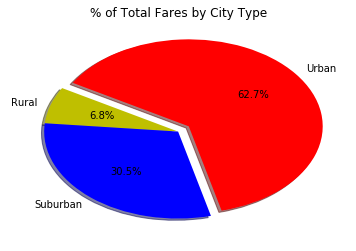

In [51]:
# Calculate Type Percents
groupby_type = merge_df.groupby('type')
fare_total = groupby_type['fare'].sum()
#print(fare_sum)

# Build Pie Chart

plt.pie(fare_total, explode = [0,0,.1], colors = ['y','blue','r'], labels = fare_sum.index, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% of Total Fares by City Type')

# Save Figure

plt.savefig("../Images/Pie_chart_Total_Fares.png")


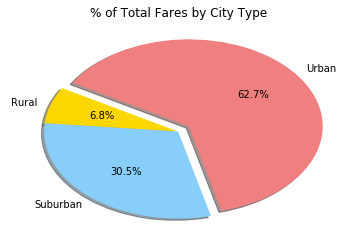

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

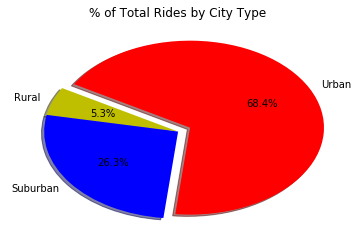

In [52]:
# Calculate Ride Percents
rides_total = groupby_type['ride_id'].count()

# Build Pie Chart
plt.pie(rides_total, explode = [0,0,.1], colors = ['y','blue','r'], labels = fare_sum.index, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("../Images/Pie_chart_Total_Rides.png")


In [53]:
# Show Figure
plt.show()

## Total Drivers by City Type

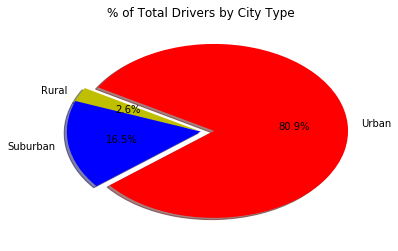

In [100]:
# Calculate Driver Percents
new_df = merge_df.iloc[:,0:3]
new_df = new_df.drop_duplicates('city', keep = 'first')
groupby_driver_count = new_df.groupby('type')

driver_count = groupby_driver_count['driver_count'].sum()

# Build Pie Charts
plt.pie(driver_count, explode = [0,0,.1], colors = ['y','blue','r'], labels = fare_sum.index, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("../Images/Pie_chart_Total_Drivers.png")


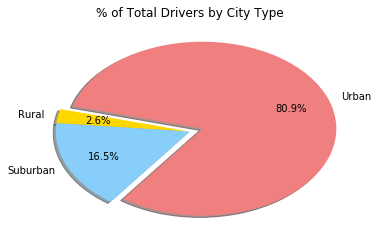

In [6]:
# Show Figure
plt.show()